In [1]:
import torch
from normalizing_flows import Flow
from normalizing_flows.architectures import RealNVP
import matplotlib.pyplot as plt
import numpy as np

from shapes import circle, double_circle, n_regular_polygon, grid

In [2]:

torch.manual_seed(0)

n_data = 1000
n_dim = 3

x = torch.randn(n_data, n_dim)  # Generate some training data
bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(x)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(x)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points


# print head of x
print(x.shape)

torch.Size([1000, 3])


In [3]:
print(x)

tensor([[-1.1258, -1.1524, -0.2506],
        [-0.4339,  0.8487,  0.6920],
        [-0.3160, -2.1152,  0.3223],
        ...,
        [ 1.2965, -0.1078,  0.7482],
        [-0.7423,  0.3447,  1.6422],
        [-0.3266,  0.3669, -0.7245]])


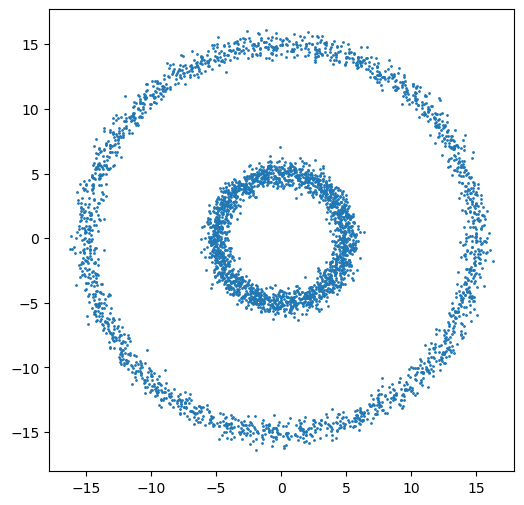

In [4]:
# Number of points, radius of the circle, and noise factor
num_points = 2000
radius = 5
noise_factor = 0.5

# Generate the dataset
data = double_circle(radius1=radius, radius2=radius*3, num_points=num_points, noise_std=noise_factor)

# Plot the generated points
plt.figure(figsize=(6,6))
plt.scatter(data[0], data[1], s=1)
plt.show()

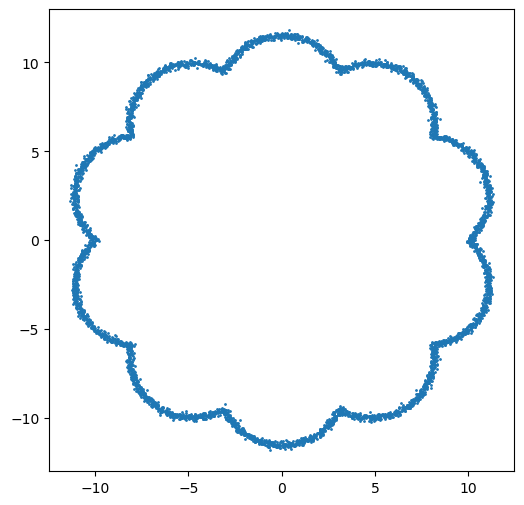

In [5]:

x, y = n_regular_polygon(n=10, radius=10, angle=0, arc_height=-2, num_points=5000, noise_std=0.1)

# Plotting the generated points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
# plt.scatter(x_vertices, y_vertices, s=10, c="r") # for debugging
# plt.scatter(arc_x_centers, arc_y_centers, s=10, c="g") # for debugging
plt.show()


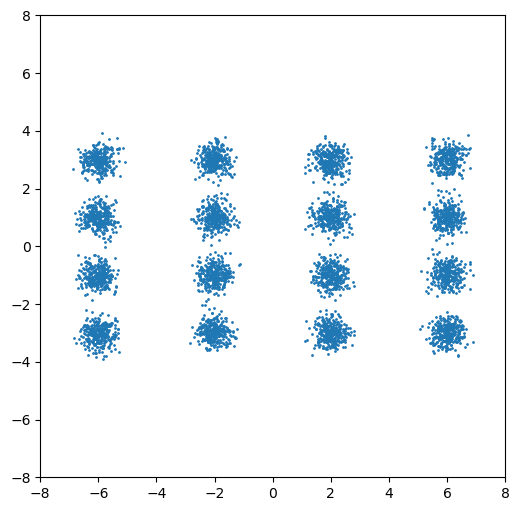

In [14]:
x, y = grid(n=4, dist=(4, 2), num_points=5000, noise_std=0.3, seed=0)

# Plotting the generated points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
# plt.xlim(-8, 8)
# plt.ylim(-8, 8)
plt.show()

In [92]:
def moons(radius, num_points, noise_std, angle=0, shift = None, seed=None):
    if seed is not None:
        np.random.seed(seed)

    if shift is None:
        shift_x = shift_y = radius/2
    elif isinstance(shift, (int, float)):
        shift_x = shift_y = shift
    else: 
        try:
            shift_x, shift_y = shift
        except ValueError as e:
            print("shift must be a float/int or a tuple of two floats/ints")
            raise e

    # compute number of points in each half circle
    n_points_out = n_points_inn = int(num_points / 2)
    if num_points % 2 == 1:
        n_samples_out += 1

    
    outer_circ_x = radius * np.cos(np.linspace(0, np.pi, n_points_out)) - shift_x
    outer_circ_y = radius * np.sin(np.linspace(0, np.pi, n_points_out)) - shift_y/2
    inner_circ_x = radius * np.cos(np.linspace(np.pi, 2*np.pi, n_points_out)) + shift_x
    inner_circ_y = radius * np.sin(np.linspace(np.pi, 2*np.pi, n_points_out)) + shift_y/2

    # append the two half circles and merge them into moon shapes
    x = np.vstack([np.append(outer_circ_x, inner_circ_x)])
    y = np.vstack([np.append(outer_circ_y, inner_circ_y)])

    # add noise
    x += np.random.normal(0, noise_std, size=x.shape)
    y += np.random.normal(0, noise_std, size=y.shape)

    if angle != 0:
        raise NotImplementedError("Rotation not implemented yet")
        # convert angle to radians
        angle = angle * np.pi / 180
        # rotate the moons
        x = x * np.cos(angle) - y * np.sin(angle)
        y = x * np.sin(angle) + y * np.cos(angle)
    return x, y

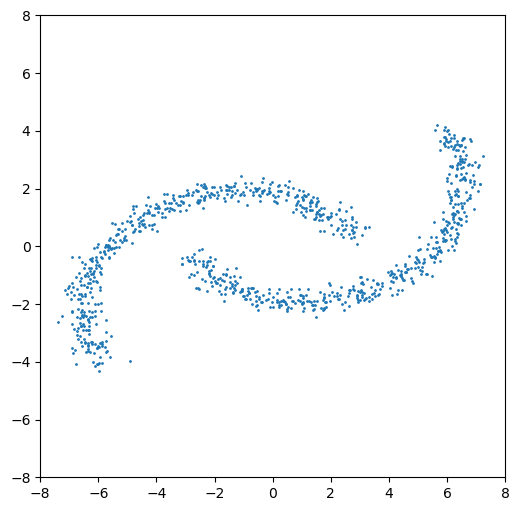

In [97]:
x, y = moons(radius=5, angle=30, num_points=1000, noise_std=0.3, seed=0)

# Plotting the generated points
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=1)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [96]:
torch.manual_seed(0)

data_tensor = torch.tensor(np.stack(data, axis=1)).float()  # Generate some training data

n_data = num_points * 2
n_dim = 2

bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(data_tensor)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(data_tensor)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points

print(log_prob.shape)  # (100,)


KeyboardInterrupt: 

In [6]:
print(x_new.shape) 

torch.Size([50, 2])


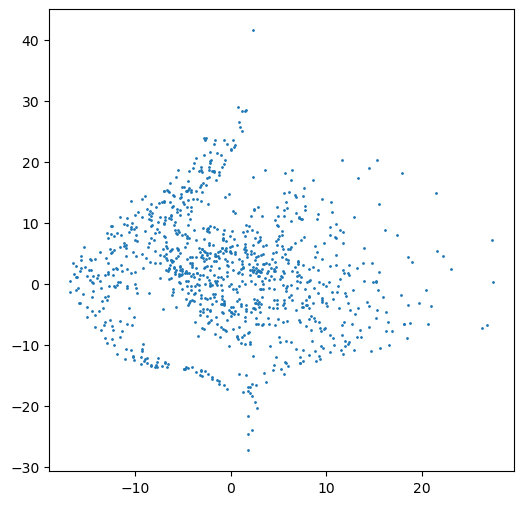

In [7]:
x_new = flow.sample(1000)  # Sample 50 new data points

# revert x_new to numpy array
x_new = x_new.detach().numpy()

# plot new data
plt.figure(figsize=(6,6))
plt.scatter(x_new[:,0], x_new[:,1], s=1)
plt.show()

In [10]:
# print all parts of bijection one by one
    

RealNVP(
  (layers): ModuleList(
    (0): ElementwiseAffine(
      (conditioner): NullConditioner()
      (conditioner_transform): Constant(
        (context_combiner): Bypass()
      )
      (transformer): Affine()
    )
    (1): ReversePermutation(
      (matrix): PermutationMatrix()
    )
    (2): AffineCoupling(
      (conditioner): Coupling()
      (conditioner_transform): FeedForward(
        (context_combiner): Bypass()
        (sequential): Sequential(
          (0): Linear(in_features=1, out_features=4, bias=True)
          (1): Tanh()
          (2): Linear(in_features=4, out_features=2, bias=True)
          (3): Unflatten(dim=-1, unflattened_size=(1, 2))
        )
      )
      (transformer): Affine()
    )
    (3): ReversePermutation(
      (matrix): PermutationMatrix()
    )
    (4): AffineCoupling(
      (conditioner): Coupling()
      (conditioner_transform): FeedForward(
        (context_combiner): Bypass()
        (sequential): Sequential(
          (0): Linear(in_featu

In [11]:
def generate_grid_data(x_range, y_range, x_tick, y_tick):
    # Generate x and y values for the grid
    x_values = torch.linspace(x_range[0], x_range[1], x_tick)
    y_values = torch.linspace(y_range[0], y_range[1], y_tick)
    
    # Create grid points
    grid_points = torch.cartesian_prod(x_values, y_values)
    
    return grid_points

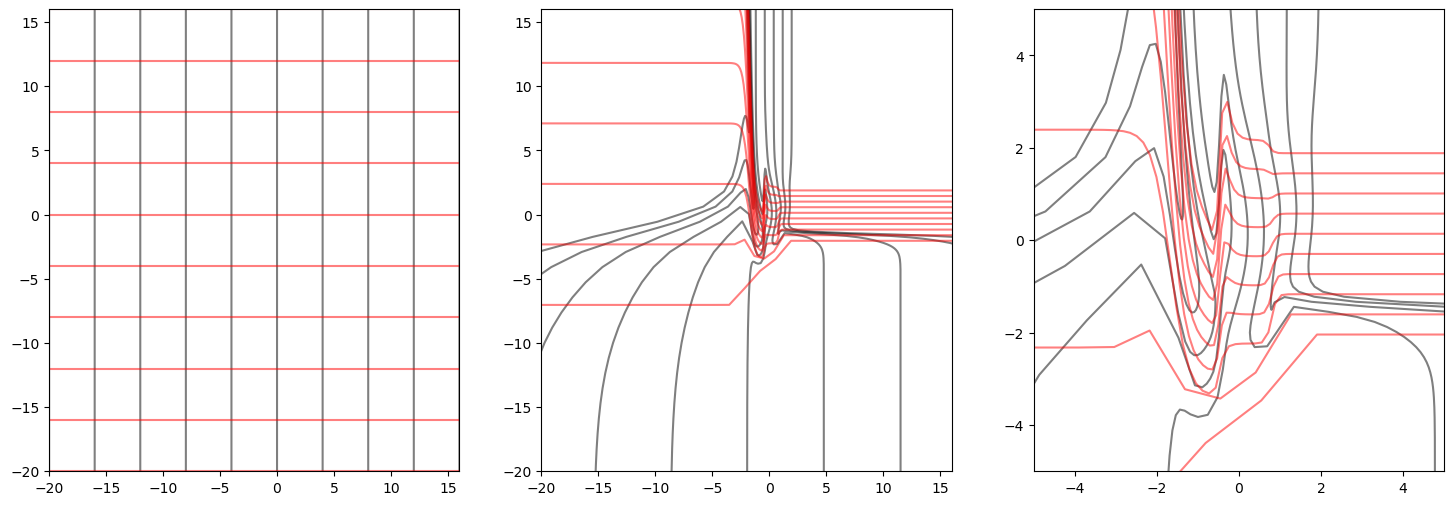

In [15]:
# Define parameters
x_range = range(-20, 20, 4)  # Range of values to cover in x coordinates
y_range = range(-20, 20, 4)  # Range of values to cover in y coordinates
line_density = 10000  # Number of points to generate in each direction
bottom_limit = -5000 # bottom limit for the line creation
upper_limit = 5000 # upper limit for the line creation

# create 2 seperate plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

# limit plot to the range of x and y
ax1.set_xlim(x_range[0], x_range[-1])
ax1.set_ylim(y_range[0], y_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])
ax2.set_ylim(y_range[0], y_range[-1])
ax3.set_xlim(-5, 5)
ax3.set_ylim(-5, 5)

transformed = []

for x in x_range:
    # generate a line of points along the y-axis at x
    y = torch.linspace(bottom_limit, upper_limit, line_density)
    x_plt = torch.ones_like(y) * x
    
    # plot the line on the first plot
    ax1.plot(x_plt, y, color='black', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x_plt, y), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second, and third plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='black', alpha=0.5)
    ax3.plot(transformed_points[:,0], transformed_points[:,1], color='black', alpha=0.5)


# add grid of y dircetion too but on same plots
for y in y_range:
    # generate a line of points along the x-axis at y
    x = torch.linspace(bottom_limit, upper_limit, line_density)
    y_plt = torch.ones_like(x) * y
    
    # plot the line on the first plot
    ax1.plot(x, y_plt, color='red', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x, y_plt), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='red', alpha=0.5)
    ax3.plot(transformed_points[:,0], transformed_points[:,1], color='red', alpha=0.5)

plt.show()